In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [2]:
ta = pd.read_csv("Tel_Aviv.csv")

In [3]:
ta.head(10)

,datetime,pressure,humidity,temperature,weather,wind direction,wind speed
0,2012-10-01 12:00:00,NaN,NaN,NaN,sky is not clear,NaN,NaN
1,2012-10-01 13:00:00,1012.0,63.0,305.470000,sky is clear,0.0,0.0
2,2012-10-01 14:00:00,1012.0,62.0,304.310000,sky is clear,0.0,0.0
3,2012-10-01 15:00:00,1012.0,62.0,304.281841,sky is clear,0.0,0.0
4,2012-10-01 16:00:00,1012.0,62.0,304.238015,sky is clear,0.0,0.0
5,2012-10-01 17:00:00,1012.0,62.0,304.194188,sky is clear,0.0,0.0
6,2012-10-01 18:00:00,1012.0,63.0,304.150361,sky is clear,0.0,0.0
7,2012-10-01 19:00:00,1012.0,63.0,304.106534,sky is clear,0.0,1.0
8,2012-10-01 20:00:00,1012.0,63.0,304.062708,sky is clear,0.0,1.0
9,2012-10-01 21:00:00,1012.0,64.0,304.018881,sky is clear,0.0,1.0


In [4]:
ta.drop(['pressure', 'temperature', 'weather', 'wind direction', 'wind speed'], axis = 1, inplace = True)

In [5]:
ta.rename(columns = {'datetime': 'ds', 'humidity': 'y'}, inplace = True)
ta.head()

,ds,y
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,63.0
2,2012-10-01 14:00:00,62.0
3,2012-10-01 15:00:00,62.0
4,2012-10-01 16:00:00,62.0


In [6]:
ta.tail()

,ds,y
45248,2017-11-29 20:00:00,NaN
45249,2017-11-29 21:00:00,NaN
45250,2017-11-29 22:00:00,NaN
45251,2017-11-29 23:00:00,NaN
45252,2017-11-30 00:00:00,NaN


In [7]:
ta['ds'] = pd.to_datetime(ta['ds'])

In [8]:
ta.head()

,ds,y
0,2012-10-01 12:00:00,NaN
1,2012-10-01 13:00:00,63.0
2,2012-10-01 14:00:00,62.0
3,2012-10-01 15:00:00,62.0
4,2012-10-01 16:00:00,62.0


In [9]:
ta.columns

Index(['ds', 'y'], dtype='object')

In [10]:
model = Prophet()
model.fit(ta)

Initial log joint probability = -660.5


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       65603.4    0.00710075       2248.72     0.05565           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       65724.8    0.00445184       387.432      0.8683      0.8683      235   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       65756.6    0.00641192       396.982           1           1      345   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       65768.9     0.0190933       246.212           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       65780.3    0.00317239       448.331           1           1      583   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

In [11]:
# forecast = model.predict(future)
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [12]:
# model.plot(forecast)
# plt.show()

In [13]:
from dateutil import rrule
from datetime import datetime, timedelta

now = datetime(2017, 12, 1, 1, 0, 0)
daysLater = now + timedelta(days=1825)

future_dates = []
for dt in rrule.rrule(rrule.HOURLY, dtstart=now, until=daysLater):
    future_dates.append(dt)
future_dates = pd.DataFrame(future_dates)
future_dates.columns = ['ds']
future_dates['ds'] = pd.to_datetime(future_dates['ds'])

forecast = model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
43796,2022-11-29 21:00:00,49.837584,-193.664581,286.672243
43797,2022-11-29 22:00:00,50.805127,-197.335798,289.852995
43798,2022-11-29 23:00:00,51.588221,-191.918922,295.151812
43799,2022-11-30 00:00:00,52.188773,-195.409304,286.311114
43800,2022-11-30 01:00:00,52.753181,-188.455448,291.522444


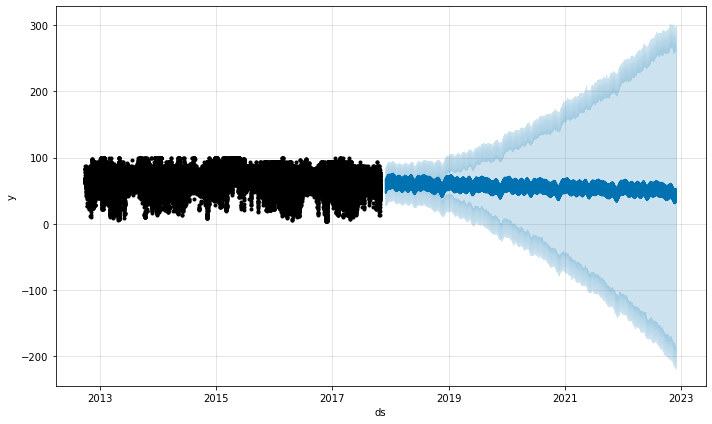

In [14]:
model.plot(forecast)
plt.show()

In [15]:
forecast = forecast[['ds', 'yhat']]
forecast['yhat'] = forecast['yhat'].round(1)
print(forecast)

                       ds  yhat
0     2017-12-01 01:00:00  66.9
1     2017-12-01 02:00:00  67.3
2     2017-12-01 03:00:00  67.3
3     2017-12-01 04:00:00  66.0
4     2017-12-01 05:00:00  62.9
...                   ...   ...
43796 2022-11-29 21:00:00  49.8
43797 2022-11-29 22:00:00  50.8
43798 2022-11-29 23:00:00  51.6
43799 2022-11-30 00:00:00  52.2
43800 2022-11-30 01:00:00  52.8

[43801 rows x 2 columns]


In [16]:
compression_opts = dict(method = 'zip', archive_name = 'Humidity.csv')  
forecast.to_csv('Humidity.zip', index = False, compression = compression_opts)